In [58]:
# Loading DataSet

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import joblib 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

In [10]:
# Our data contain seperator as colon so we have to specify the sperator

df = pd.read_csv('./bankruptcy-prevention.csv', sep=';')
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [11]:
# Checking the Columns
df.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [12]:
# Checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [13]:
# Getting Discriptive statistic parameters
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [15]:
df1 = df.iloc[:,:-1]
df1

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0,0.0
247,0.0,1.0,1.0,0.5,0.5,0.0
248,1.0,0.0,0.5,1.0,0.5,0.0


In [16]:
df[' class']

0          bankruptcy
1          bankruptcy
2          bankruptcy
3          bankruptcy
4          bankruptcy
            ...      
245    non-bankruptcy
246    non-bankruptcy
247    non-bankruptcy
248    non-bankruptcy
249    non-bankruptcy
Name:  class, Length: 250, dtype: object

In [17]:
# Using Label Encoder to Encode the Class Column to Numerical
# 0:- Bankruptcy and 1:- Non-Bankruptcy

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[' class'] = le.fit_transform(df[' class'])
df[' class']
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [18]:
# Anomaly Detection Using Isolation Forest
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=100,contamination=0.01)
clf.fit(df)
y_pred_outliers = clf.predict(df)
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [19]:
df["scores"] = clf.decision_function(df)
df["anamoly"] = clf.predict(df.iloc[:,0:7])
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,scores,anamoly
0,0.5,1.0,0.0,0.0,0.0,0.5,0,0.138671,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.167206,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0,0.077006,1
3,0.5,0.0,0.0,0.5,0.0,1.0,0,0.053644,1
4,1.0,1.0,0.0,0.0,0.0,1.0,0,0.207305,1
...,...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1,0.087642,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1,0.082780,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1,0.082498,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1,0.078103,1


In [20]:
df[df["anamoly"]==-1]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,scores,anamoly
27,0.0,0.0,0.0,0.0,0.0,1.0,0,-0.002222,-1
72,1.0,0.5,1.0,0.5,0.0,0.0,0,-0.051742,-1
192,0.5,1.0,0.0,0.0,1.0,0.0,1,-0.009930,-1


In [21]:
df = df.drop(df.index[[27,72,192]],axis=0)
df.reset_index(drop=True,inplace = True)
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,scores,anamoly
0,0.5,1.0,0.0,0.0,0.0,0.5,0,0.138671,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.167206,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0,0.077006,1
3,0.5,0.0,0.0,0.5,0.0,1.0,0,0.053644,1
4,1.0,1.0,0.0,0.0,0.0,1.0,0,0.207305,1
...,...,...,...,...,...,...,...,...,...
242,0.0,1.0,1.0,1.0,1.0,1.0,1,0.087642,1
243,1.0,1.0,0.5,1.0,1.0,0.0,1,0.082780,1
244,0.0,1.0,1.0,0.5,0.5,0.0,1,0.082498,1
245,1.0,0.0,0.5,1.0,0.5,0.0,1,0.078103,1


In [22]:
df = df.iloc[:,0:7]
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
242,0.0,1.0,1.0,1.0,1.0,1.0,1
243,1.0,1.0,0.5,1.0,1.0,0.0,1
244,0.0,1.0,1.0,0.5,0.5,0.0,1
245,1.0,0.0,0.5,1.0,0.5,0.0,1


In [23]:
# Checking Value count for Each column

for col in df.columns:
    print(f"{col}: {df[col].value_counts()}")

industrial_risk: industrial_risk
1.0    88
0.5    80
0.0    79
Name: count, dtype: int64
 management_risk:  management_risk
1.0    118
0.5     68
0.0     61
Name: count, dtype: int64
 financial_flexibility:  financial_flexibility
0.0    117
0.5     74
1.0     56
Name: count, dtype: int64
 credibility:  credibility
0.0    92
1.0    79
0.5    76
Name: count, dtype: int64
 competitiveness:  competitiveness
0.0    101
1.0     90
0.5     56
Name: count, dtype: int64
 operating_risk:  operating_risk
1.0    113
0.0     77
0.5     57
Name: count, dtype: int64
 class:  class
1    142
0    105
Name: count, dtype: int64


# EDA

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

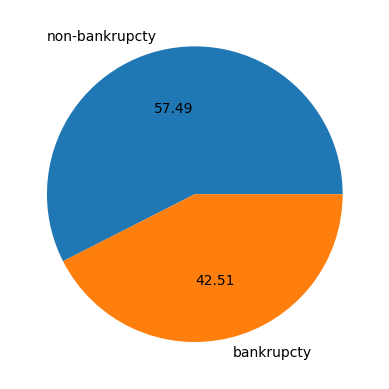

In [25]:
# Pie chart for Class column to know the ratio of each values in Class column

plt.pie(x = df[' class'].value_counts(),labels=['non-bankrupcty','bankrupcty'],autopct='%0.2f')
plt.show()

C:\Users\Mohan Gola\AppData\Local\Temp\ipykernel_31456\507629980.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[' competitiveness'],color='red',shade=True)
C:\Users\Mohan Gola\AppData\Local\Temp\ipykernel_31456\507629980.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[' credibility'],color='blue',shade=True)
C:\Users\Mohan Gola\AppData\Local\Temp\ipykernel_31456\507629980.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[' financial_flexibility'],color='purple',shade=True)
C:\Users\Mohan Gola\AppData\Local\Temp\ipykernel_31456\507629980.py:11: FutureWarning: 

`shade` is now deprecated in favor of 

<Axes: xlabel='industrial_risk', ylabel='Density'>

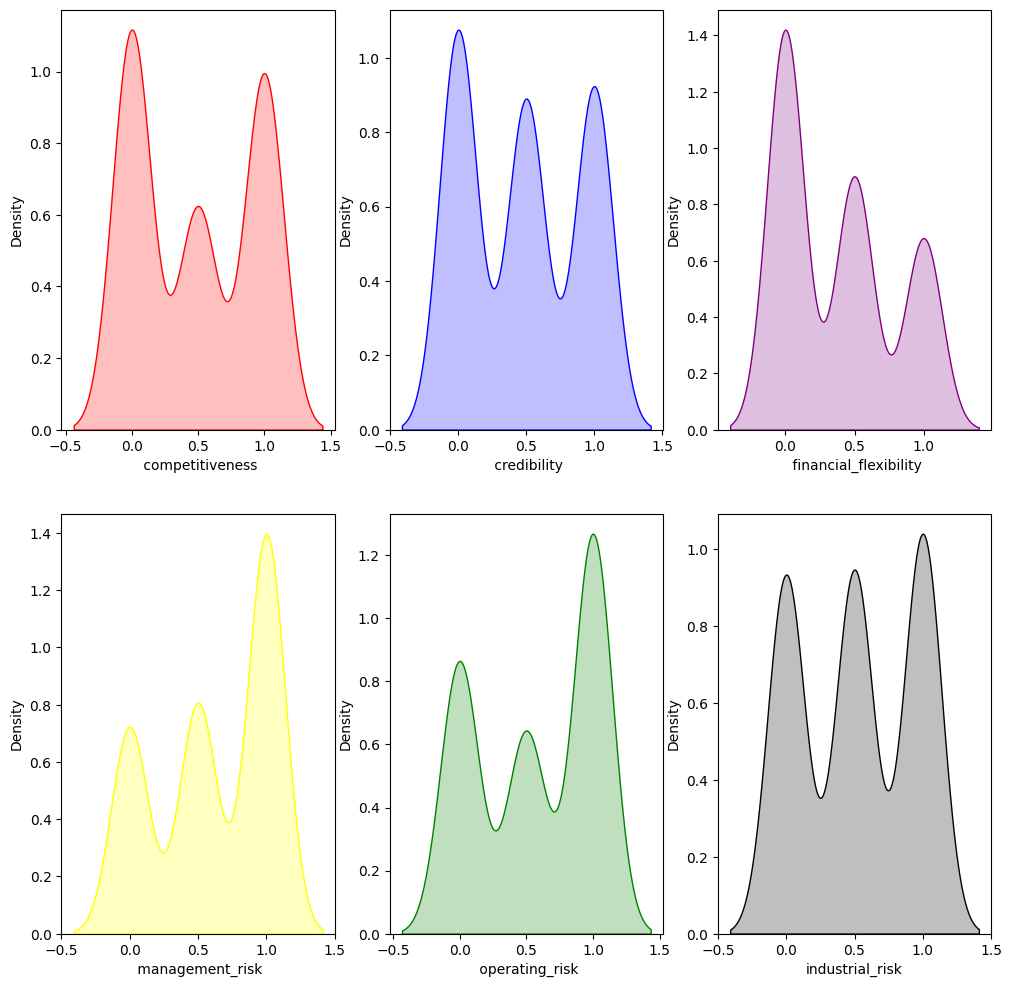

In [26]:
# Distribution of Each Column
plt.figure(figsize=(12,12))
df1 = df.iloc[:,:-1]
plt.subplot(2,3,1)
sns.kdeplot(df1[' competitiveness'],color='red',shade=True)
plt.subplot(2,3,2)
sns.kdeplot(df1[' credibility'],color='blue',shade=True)
plt.subplot(2,3,3)
sns.kdeplot(df1[' financial_flexibility'],color='purple',shade=True)
plt.subplot(2,3,4)
sns.kdeplot(df1[' management_risk'],color='yellow',shade=True)
plt.subplot(2,3,5)
sns.kdeplot(df1[' operating_risk'],color='green',shade=True)
plt.subplot(2,3,6)
sns.kdeplot(df1['industrial_risk'],color='black',shade=True)



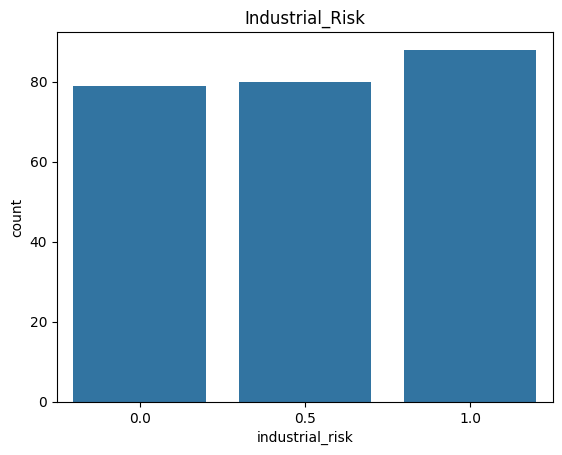

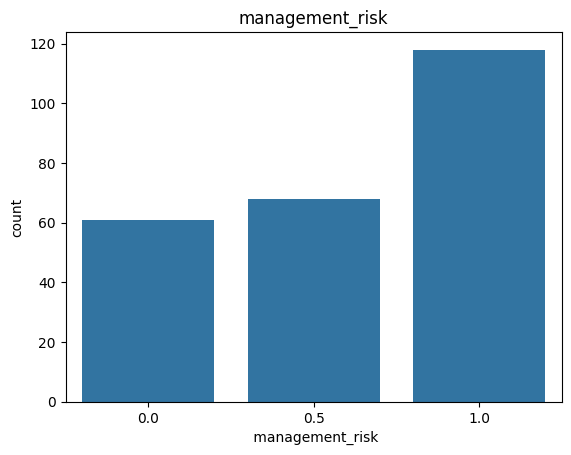

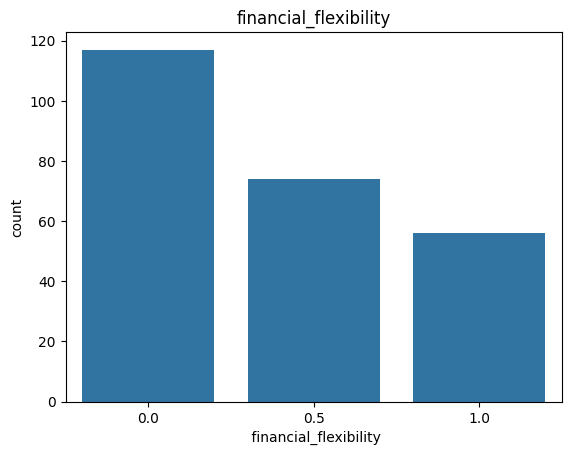

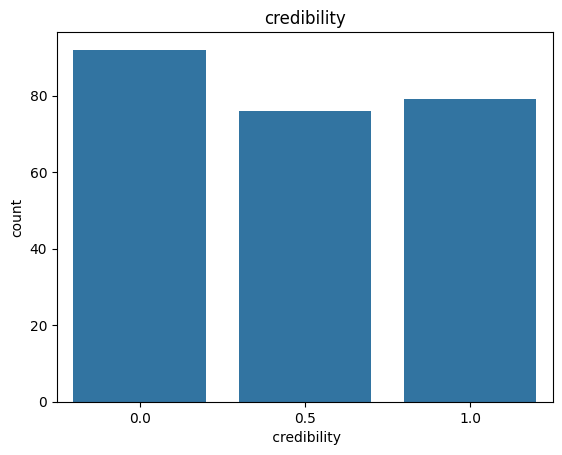

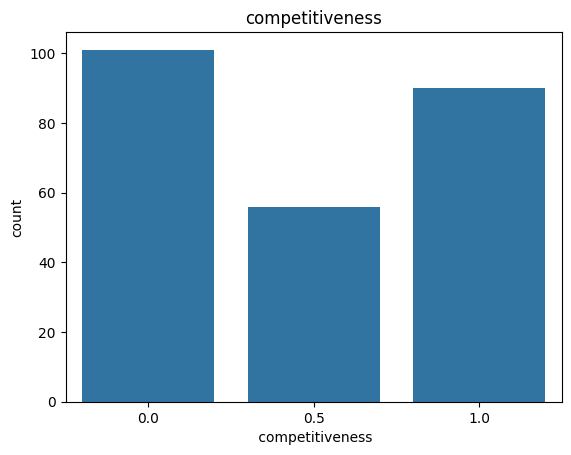

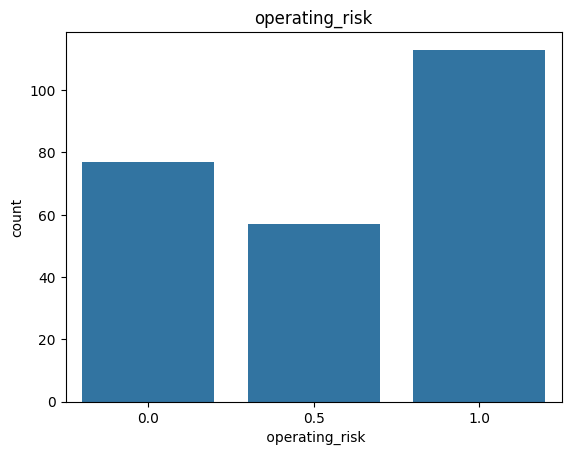

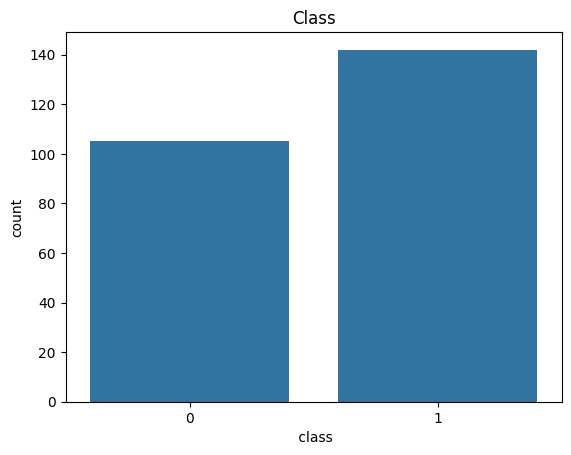

In [27]:
# countplot for each Columns to know the count of Unique Values

plt.title('Industrial_Risk')
sns.countplot(data=df,x = df['industrial_risk'])
plt.show()
plt.title('management_risk')
sns.countplot(data=df,x = df[' management_risk'])
plt.show()
plt.title('financial_flexibility')
sns.countplot(data=df,x = df[' financial_flexibility'])
plt.show()
plt.title('credibility')
sns.countplot(data=df,x = df[' credibility'])
plt.show()
plt.title('competitiveness')
sns.countplot(data=df,x = df[' competitiveness'])
plt.show()
plt.title('operating_risk')
sns.countplot(data=df,x = df[' operating_risk'])
plt.show()
plt.title('Class')
sns.countplot(data=df,x = df[' class'])
plt.show()



C:\Users\Mohan Gola\AppData\Local\Temp\ipykernel_31456\3639406953.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,x = df[' class'],y = df['industrial_risk'],palette='viridis')


<Axes: xlabel=' class', ylabel='industrial_risk'>

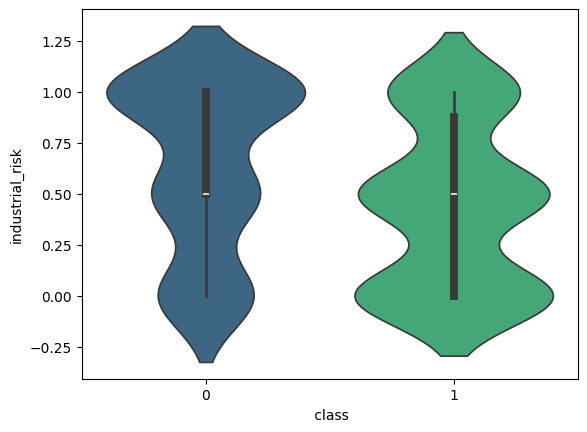

In [28]:
# we can understand Distribution of Industrial_rsik for Each Class
# For Bankruptcy the IQR lies between 0.5 to 1 and It has more point distribution as 1.
# For Non-Bankruptcy the IQR lies between 0 to 0.75 and It has more point distribution as 0.
sns.violinplot(data=df,x = df[' class'],y = df['industrial_risk'],palette='viridis')

C:\Users\Mohan Gola\AppData\Local\Temp\ipykernel_31456\4187918823.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,y =df[' management_risk'], x  = df[' class'],palette='viridis')


<Axes: xlabel=' class', ylabel=' management_risk'>

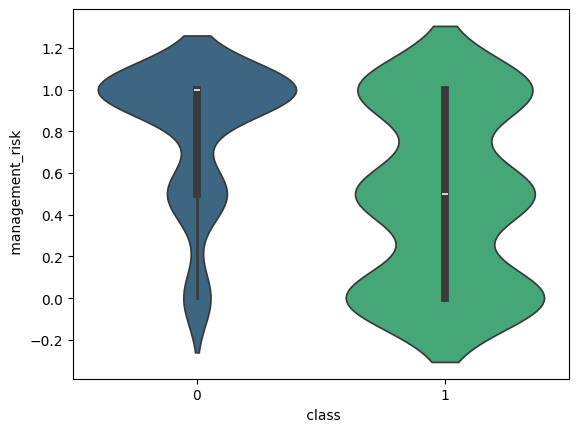

In [29]:
# we can understand Distribution of Management_risk for Each Class
# For Bankruptcy the IQR lies between 0.5 to 1 and It has more point distribution as 1.
# For Non-Bankruptcy the IQR lies between 0 to 1 and It has constant distribution.

sns.violinplot(data=df,y =df[' management_risk'], x  = df[' class'],palette='viridis')

C:\Users\Mohan Gola\AppData\Local\Temp\ipykernel_31456\637120876.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,y =df[' competitiveness'], x  = df[' class'],palette='viridis')


<Axes: xlabel=' class', ylabel=' competitiveness'>

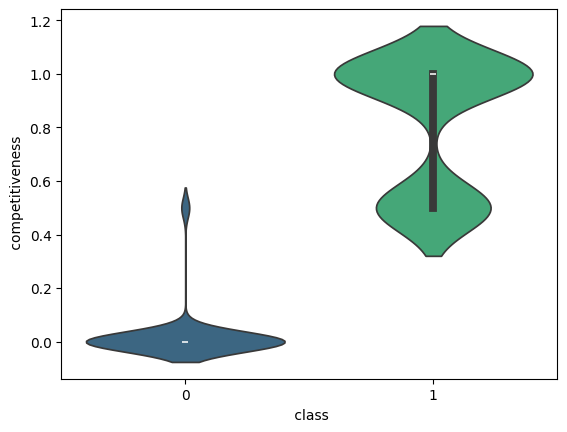

In [30]:
# Violin Distribution of Competitiveness for Each Class
# For bankruptcy It has most of the point distribution at 0.
# For Non-Bankruptcy the IQR lies between 0.5 to 1 and The most of the distribution value is 0.5 and 1.

sns.violinplot(data=df,y =df[' competitiveness'], x  = df[' class'],palette='viridis')

C:\Users\Mohan Gola\AppData\Local\Temp\ipykernel_31456\3458286083.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,y =df[' credibility'], x  = df[' class'],palette='viridis')


<Axes: xlabel=' class', ylabel=' credibility'>

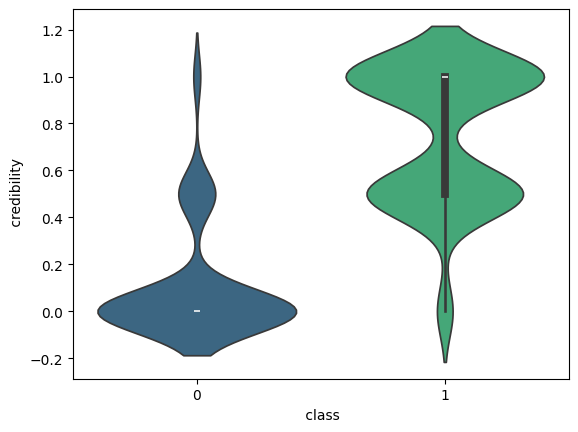

In [31]:
# Violin Distribution of Credibility for Each Class
# For bankruptcy It has most of the point distribution at 0.
# For Non-Bankruptcy the IQR lies between 0.5 to 1 and The most of the distribution value is 0.5 and 1.

sns.violinplot(data=df,y =df[' credibility'], x  = df[' class'],palette='viridis')

C:\Users\Mohan Gola\AppData\Local\Temp\ipykernel_31456\969223215.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,y =df[' financial_flexibility'], x  = df[' class'],palette='viridis')


<Axes: xlabel=' class', ylabel=' financial_flexibility'>

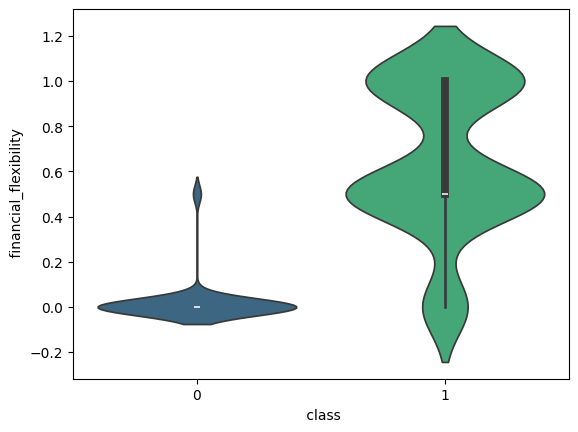

In [32]:
# Violin Distribution of Financial_Flexibility for Each Class
# For bankruptcy It has most of the point distribution at 0.
# For Non-Bankruptcy the IQR lies between 0.5 to 1 and The most of the distribution value is 0.5 and 1.

sns.violinplot(data=df,y =df[' financial_flexibility'], x  = df[' class'],palette='viridis')

C:\Users\Mohan Gola\AppData\Local\Temp\ipykernel_31456\3238304010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,y =df[' operating_risk'], x  = df[' class'],palette='viridis')


<Axes: xlabel=' class', ylabel=' operating_risk'>

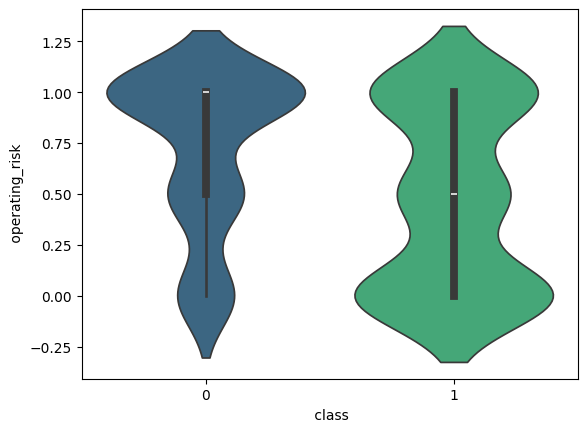

In [33]:
# Violin Distribution of Financial_Flexibility for Each Class
# For bankruptcy It has most of the point distribution at 0.
# For Non-Bankruptcy the IQR lies between 0.5 to 1 and The most of the distribution value is 0.5 and 1.

sns.violinplot(data=df,y =df[' operating_risk'], x  = df[' class'],palette='viridis')

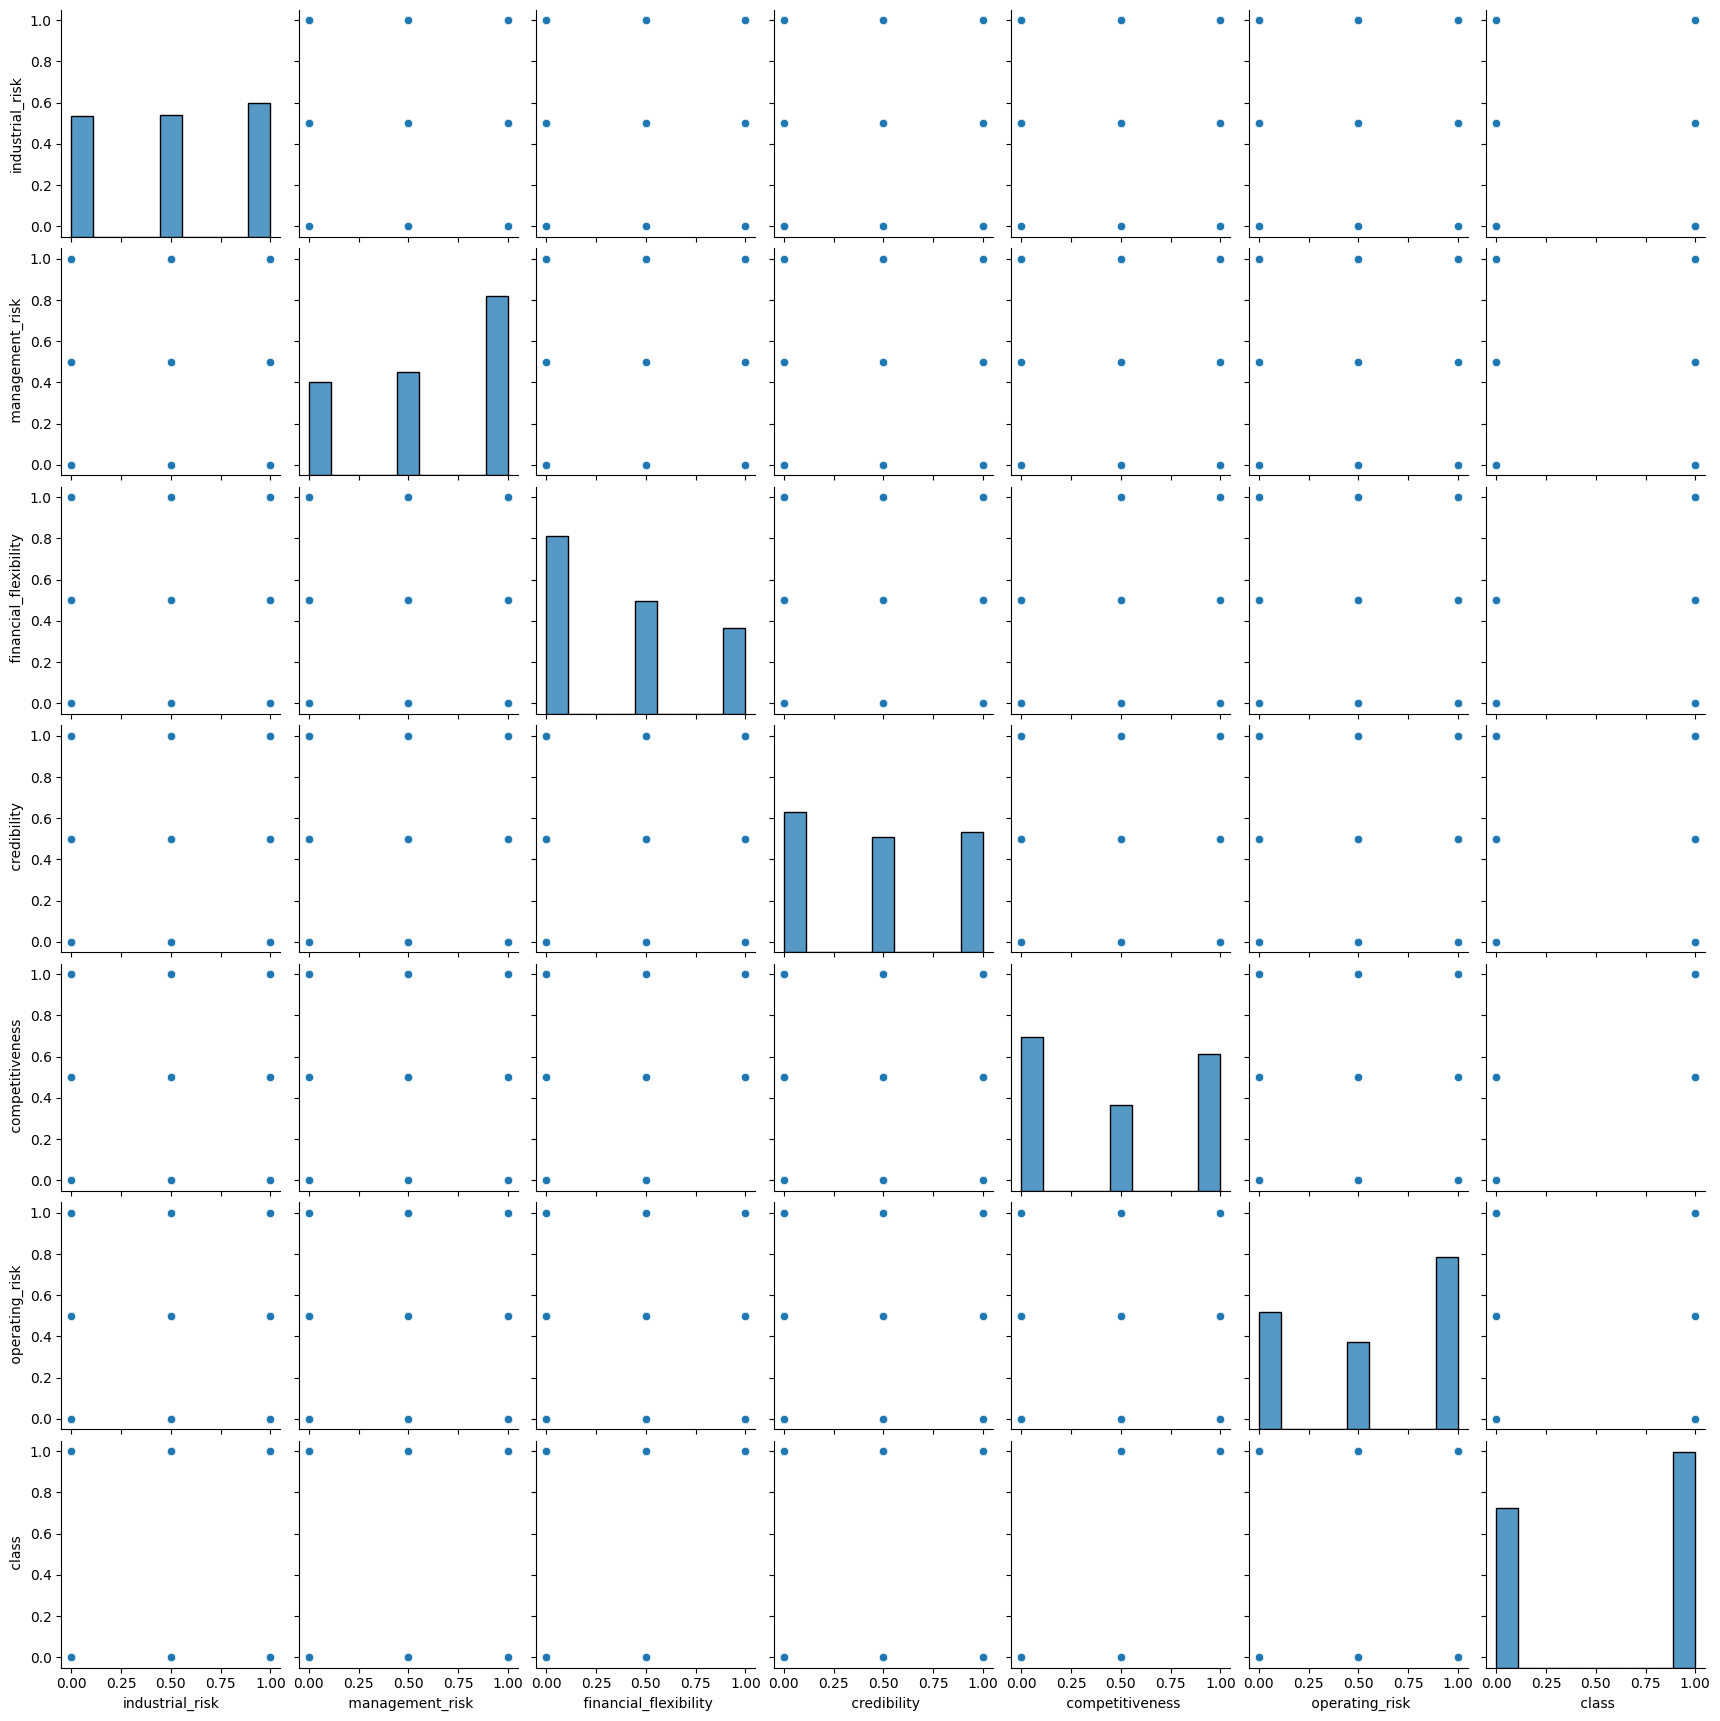

In [34]:
# Pairplots 

sns.pairplot(data=df)
plt.show()

# Correlation Matrix

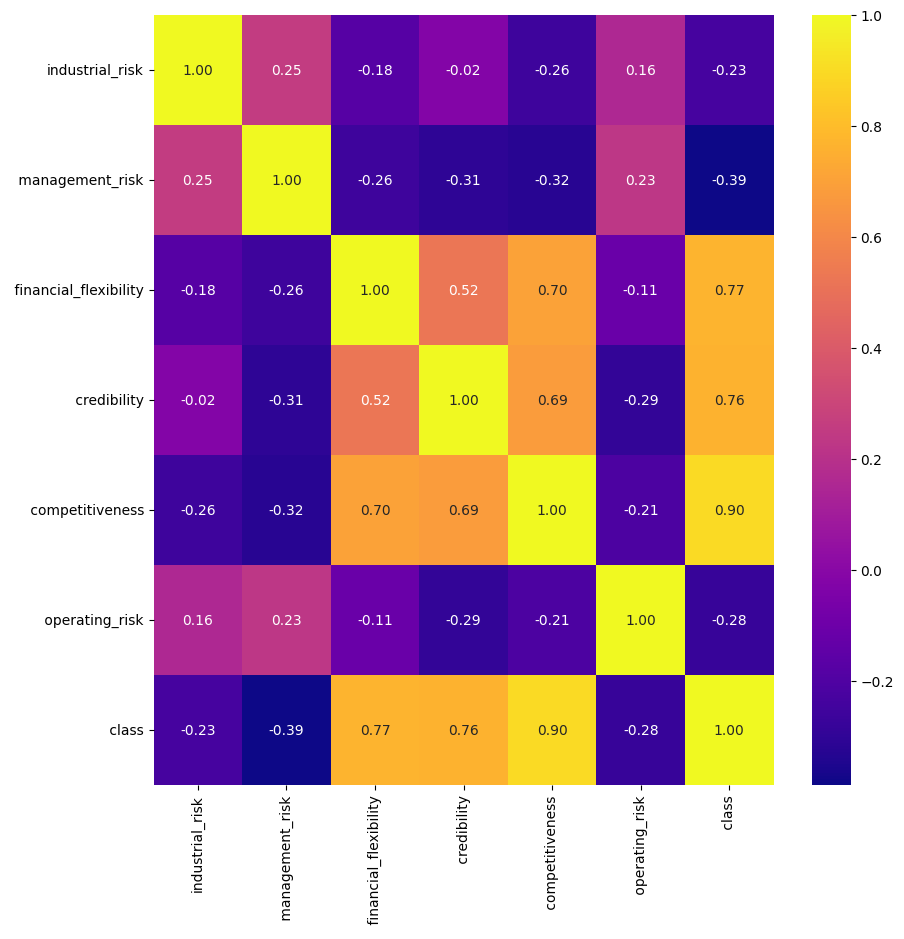

In [35]:
# Correlation Matrix 

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='plasma',annot=True,fmt=".2f")
plt.show()

In [36]:
# Divinding the data into Independent and Dependented Features

X = df.iloc[:,:-1]
print(X)
y = df.iloc[:,-1:]
print(y)

     industrial_risk   management_risk   financial_flexibility   credibility  \
0                0.5               1.0                     0.0           0.0   
1                0.0               1.0                     0.0           0.0   
2                1.0               0.0                     0.0           0.0   
3                0.5               0.0                     0.0           0.5   
4                1.0               1.0                     0.0           0.0   
..               ...               ...                     ...           ...   
242              0.0               1.0                     1.0           1.0   
243              1.0               1.0                     0.5           1.0   
244              0.0               1.0                     1.0           0.5   
245              1.0               0.0                     0.5           1.0   
246              1.0               0.0                     0.5           0.5   

      competitiveness   operating_risk 

In [37]:
# Divinding the Data into training and testing

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     industrial_risk   management_risk   financial_flexibility   credibility  \
42               1.0               1.0                     0.0           0.5   
236              0.5               0.5                     1.0           0.5   
166              0.5               0.5                     0.5           1.0   
145              0.5               0.5                     0.5           0.5   
48               0.0               1.0                     0.0           0.0   
..               ...               ...                     ...           ...   
87               0.5               1.0                     0.0           0.0   
103              1.0               1.0                     0.0           0.0   
67               1.0               1.0                     0.5           0.0   
24               1.0               1.0                     0.0           0.0   
8                1.0               1.0                     0.0           0.5   

      competitiveness   operating_risk 

# Model Building

# 1. Logistic Regression

Accuracy: 1.0

Confusion Matrix:
 [[19  0]
 [ 0 31]]


d:\Bank_kurptcy\myenv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


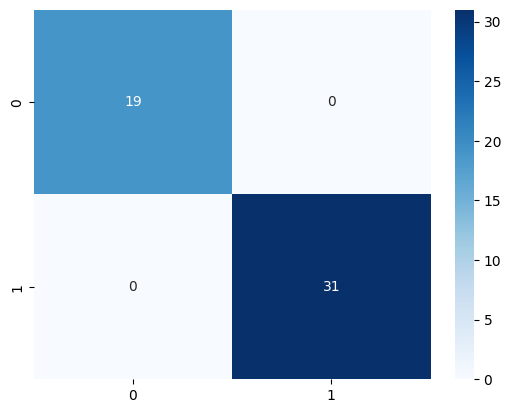


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        31

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
print("Accuracy for Logistic Regression:",accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
sns.heatmap(cm,annot=True,cmap='Blues')
plt.show()

# Classification Report 

print("\nClassification Report:\n",classification_report(y_test, y_pred))

Precision value equal to 100% for 1, means that all Non-Bankrupted Company are classified as Non-Bankrupted Comapny and none of them are classified incorrectly. While precision value for positive reviews equal to 100% for 0, it means that 100% of Bankrupted Company are classified as Bankrupted Company and none of them are classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only. In this case, our model able to predicted that 100% from the dataset are True for Bankrupted Company, and 100% from the dataset are True Positive for Non-Bankrupted Company.

F1-score value measures how many times the model made a correct prediction accurately. Our Logistic Regression model able to predict 100% correctly for negative reviews and 100% correctly for positive reviews.

In [91]:
# Performing Cross Validation To Check Overfitting Problem
from sklearn.model_selection import cross_val_score

scores_LR = cross_val_score(lr,X,y,cv=10)
print("Accuracy Score:", scores_LR.mean())
print("Standard Deviation:", scores_LR.std())

Accuracy Score: 1.0
Standard Deviation: 0.0


After Performing Cross Validation as K = 10 The accuracy is 100%
from which we can determine that Model is not overfitted


# 2 Decision Tree model

In [85]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
model_tree = dt.fit(X_train,y_train)
model_tree

DecisionTreeClassifier()

Accuracy for the Decision tree model 1.0
Confusion Matrix
[[19  0]
 [ 0 31]]


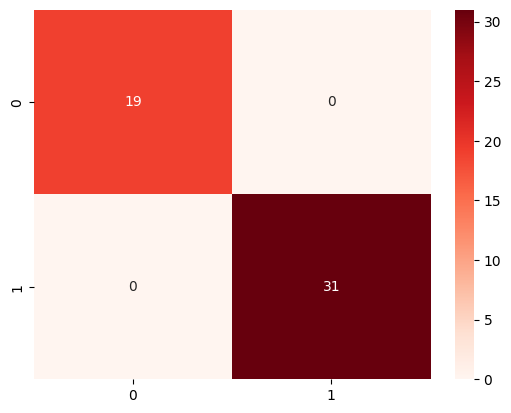


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        31

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [86]:
y_pred2 = model_tree.predict(X_test)
y_pred2

y_pred2 = model_tree.predict(X_test)
accr_DC=accuracy_score(y_test,y_pred2)
print("Accuracy for the Decision tree model",accr_DC)

cm = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix")
print(cm)
sns.heatmap(cm,annot=True,cmap='Reds')
plt.show()

# Classification Report 

print("\nClassification Report:\n",classification_report(y_test, y_pred2))


Precision value equal to 100% for 1, means that all Non-Bankrupted Company are classified as Non-Bankrupted Comapny and none of them are classified incorrectly. While precision value for positive reviews equal to 95% for 0, it means that 95% of Bankrupted Company are classified as Bankrupted Company and One them is classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only. In this case, our model able to predicted that 100% from the dataset are True for Bankrupted Company, and 97% from the dataset are True Positive for Non-Bankrupted Company.

F1-score value measures how many times the model made a correct prediction accurately. Our Decison Tree model able to predict 98% correctly for negative reviews and 98% correctly for positive reviews.

In [87]:
# Performing Cross Validation for Decison Tree
from sklearn.model_selection import cross_val_score

scores_Dt = cross_val_score(model_tree,X,y,cv=10)
print("Accuracy Score:", scores_Dt.mean())
print("Standard Deviation:", scores_Dt.std())

Accuracy Score: 0.9960000000000001
Standard Deviation: 0.012000000000000009


After Performing Cross Validation as K = 10 The accuracy is 99%
from which we can determine that Decision Model is not overfitted


# 3 Support Vector Machine Classifier

Confusion Matrix
[[19  0]
 [ 0 31]]


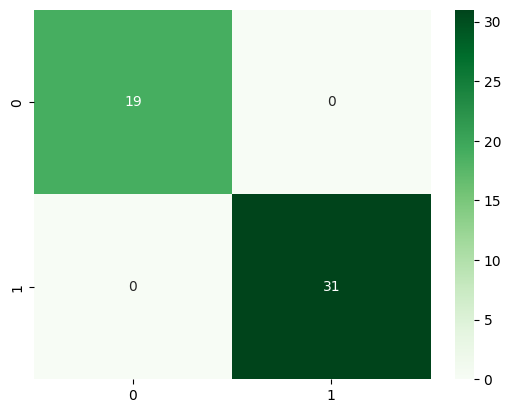


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        31

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [60]:
from sklearn.svm import SVC

Sv = SVC(random_state=42)
Sv.fit(X_train,y_train)

y_pred1 = Sv.predict(X_test)
accr_SVM=accuracy_score(y_test,y_pred1)
print("Accuracy Score for Support Vector Machine",accr_SVM)

cm = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix")
print(cm)
sns.heatmap(cm,annot=True,cmap='Greens')
plt.show()

# Classification Report 

print("\nClassification Report:\n",classification_report(y_test, y_pred1))

Precision value equal to 100% for 1, means that all Non-Bankrupted Company are classified as Non-Bankrupted Comapny and none of them are classified incorrectly. While precision value for positive reviews equal to 100% for 0, it means that 100% of Bankrupted Company are classified as Bankrupted Company and none of them are classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only. In this case, our model able to predicted that 100% from the dataset are True for Bankrupted Company, and 100% from the dataset are True Positive for Non-Bankrupted Company.

F1-score value measures how many times the model made a correct prediction accurately. Our Support Vector Machine able to predict 100% correctly for negative reviews and 100% correctly for positive reviews.

In [93]:
# Cross Validation for Support vector Classifier

from sklearn.model_selection import cross_val_score

scores_SVM = cross_val_score(Sv,X,y,cv=10)
print("Accuracy Score:", scores_SVM.mean())
print("Standard Deviation:", scores_SVM.std())

Accuracy Score: 1.0
Standard Deviation: 0.0


After Performing Cross Validation as K = 10 The accuracy is 100%
from which we can determine thatSupport Vector Model is not overfitted


# 4 Naive Bayes

In [45]:
from sklearn.naive_bayes import MultinomialNB
dt = MultinomialNB()
model_Naive = dt.fit(X_train,y_train)
model_Naive

d:\Bank_kurptcy\myenv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

Accuracy for MultinomialNB model Naive Bayes 1.0
Confusion Matrix
[[19  0]
 [ 0 31]]


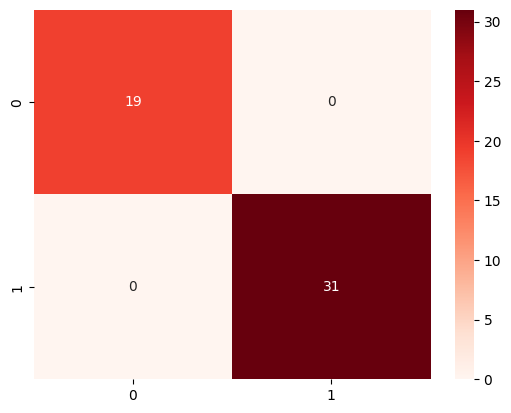


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        31

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [64]:
y_pred3 = model_Naive.predict(X_test)
y_pred3

y_pred3 = model_Naive.predict(X_test)
accr_NV=accuracy_score(y_test,y_pred3)
print("Accuracy for MultinomialNB model Naive Bayes",accr_NV)

cm = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix")
print(cm)
sns.heatmap(cm,annot=True,cmap='Reds')
plt.show()

# Classification Report 

print("\nClassification Report:\n",classification_report(y_test, y_pred3))


Precision value equal to 100% for 1, means that all Non-Bankrupted Company are classified as Non-Bankrupted Comapny and none of them are classified incorrectly. While precision value for positive reviews equal to 100% for 0, it means that 100% of Bankrupted Company are classified as Bankrupted Company and none of them are classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only. In this case, our model able to predicted that 100% from the dataset are True for Bankrupted Company, and 100% from the dataset are True Positive for Non-Bankrupted Company.

F1-score value measures how many times the model made a correct prediction accurately. Our Naive Bayes model able to predict 100% correctly for negative reviews and 100% correctly for positive reviews.

In [96]:
# Cross Validation for Support vector Classifier

from sklearn.model_selection import cross_val_score

scores_MNB = cross_val_score(model_Naive,X,y,cv=10)
print("Accuracy Score:", scores_MNB.mean())
print("Standard Deviation:", scores_MNB.std())

Accuracy Score: 0.9798333333333333
Standard Deviation: 0.02696139215001084


After Performing Cross Validation as K = 10 The accuracy is 97%
from which we can determine that Naive Bayes Model is overfitted but it will be not our final model



# 5 K-Nearest Neighbours

In [48]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
model_KNN = KNN.fit(X_train,y_train)
model_KNN

d:\Bank_kurptcy\myenv\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

Accuracy of the K-Nearest Neighbors 1.0
Confusion Matrix
[[19  0]
 [ 0 31]]


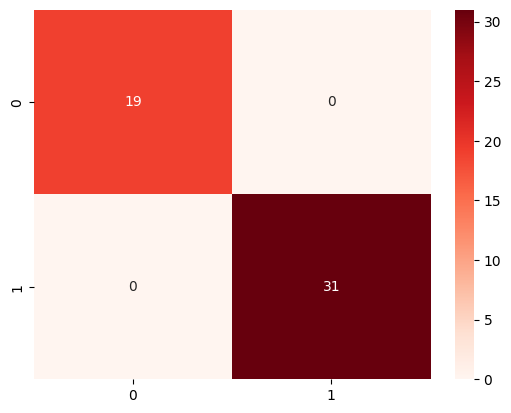


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        31

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [65]:

y_pred4 = model_Naive.predict(X_test)
accr_knn=accuracy_score(y_test,y_pred4)
print('Accuracy Score of the K-Nearest Neighbors',accr_knn)

cm = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix")
print(cm)
sns.heatmap(cm,annot=True,cmap='Reds')
plt.show()

# Classification Report 

print("\nClassification Report:\n",classification_report(y_test, y_pred4))


Precision value equal to 100% for 1, means that all Non-Bankrupted Company are classified as Non-Bankrupted Comapny and none of them are classified incorrectly. While precision value for positive reviews equal to 100% for 0, it means that 100% of Bankrupted Company are classified as Bankrupted Company and none of them are classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only. In this case, our model able to predicted that 100% from the dataset are True for Bankrupted Company, and 100% from the dataset are True Positive for Non-Bankrupted Company.

F1-score value measures how many times the model made a correct prediction accurately. Our K-Nearest Neighbours model able to predict 100% correctly for negative reviews and 100% correctly for positive reviews.

In [98]:
# Cross Validation for Support vector Classifier

from sklearn.model_selection import cross_val_score

scores_knn = cross_val_score(model_KNN,X,y,cv=10)
print("Accuracy Score:", scores_knn.mean())
print("Standard Deviation:", scores_knn.std())

Accuracy Score: 1.0
Standard Deviation: 0.0


After Performing Cross Validation as K = 10 The accuracy is 100%
from which we can determine that K-Nearest Neighbour Model is not overfitted


# 6 Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier()
model_Rf = Rf.fit(X_train,y_train)
model_Rf


RandomForestClassifier()

Accuracy Score for the Random Forest 1.0
Confusion Matrix
[[19  0]
 [ 0 31]]


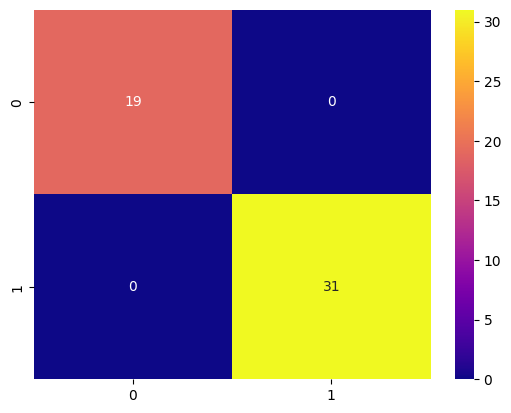


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        31

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [106]:

y_pred5 = model_Rf.predict(X_test)
accr_rf=accuracy_score(y_test,y_pred5)
print("Accuracy Score for the Random Forest",accr_rf)

cm = confusion_matrix(y_test, y_pred5)
print("Confusion Matrix")
print(cm)
sns.heatmap(cm,annot=True,cmap='plasma')
plt.show()

# Classification Report 

print("\nClassification Report:\n",classification_report(y_test, y_pred5))


Precision value equal to 100% for 1, means that all Non-Bankrupted Company are classified as Non-Bankrupted Comapny and none of them are classified incorrectly. While precision value for positive reviews equal to 100% for 0, it means that 100% of Bankrupted Company are classified as Bankrupted Company and none of them are classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only. In this case, our model able to predicted that 100% from the dataset are True for Bankrupted Company, and 100% from the dataset are True Positive for Non-Bankrupted Company.

F1-score value measures how many times the model made a correct prediction accurately. Our Random Forest model able to predict 100% correctly for negative reviews and 100% correctly for positive reviews.

In [107]:
# Cross Validation for Support Random Forest

from sklearn.model_selection import cross_val_score

scores_rf = cross_val_score(model_Rf,X,y,cv=10)
print("Accuracy Score:", scores_rf.mean())
print("Standard Deviation:", scores_rf.std())

Accuracy Score: 0.9960000000000001
Standard Deviation: 0.012000000000000009


After Performing Cross Validation as K = 10 The accuracy is 100%
from which we can determine that Random Forest Model is not overfitted


# 7 XGboost-Classifier

In [69]:
from xgboost import XGBClassifier
XGb = XGBClassifier()
model7 = XGb.fit(X_train,y_train)
model7

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy Score for the XGboost Classifier 1.0
Confusion Matrix
[[19  0]
 [ 0 31]]


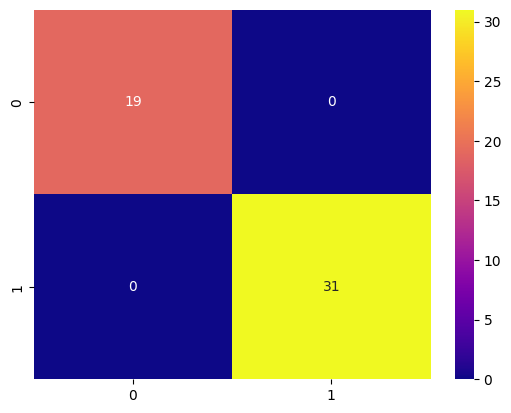


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        31

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [70]:
y_pred7 = model7.predict(X_test)
accr_xgb=accuracy_score(y_test,y_pred7)
print("Accuracy Score for the XGboost Classifier",accr_xgb)

cm = confusion_matrix(y_test, y_pred7)
print("Confusion Matrix")
print(cm)
sns.heatmap(cm,annot=True,cmap='plasma')
plt.show()

# Classification Report 

print("\nClassification Report:\n",classification_report(y_test, y_pred7))


Precision value equal to 100% for 1, means that all Non-Bankrupted Company are classified as Non-Bankrupted Comapny and none of them are classified incorrectly. While precision value for positive reviews equal to 100% for 0, it means that 100% of Bankrupted Company are classified as Bankrupted Company and none of them are classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only. In this case, our model able to predicted that 100% from the dataset are True for Bankrupted Company, and 100% from the dataset are True Positive for Non-Bankrupted Company.

F1-score value measures how many times the model made a correct prediction accurately. Our Xgboost Classifier model able to predict 100% correctly for negative reviews and 100% correctly for positive reviews.

In [102]:
# Cross Validation for XGBClassifiers
# Cross Validation for Support Random Forest

from sklearn.model_selection import cross_val_score

scores_xgb = cross_val_score(model7,X,y,cv=10)
print("Accuracy Score:", scores_xgb.mean())
print("Standard Deviation:", scores_xgb.std())


Accuracy Score: 1.0
Standard Deviation: 0.0


After Performing Cross Validation as K = 10 The accuracy is 100%
from which we can determine that XCboost Classifier Model is not overfitted


# Model Evaluation

In [103]:
print("Accuracy for Logistic Regression:",accuracy_score(y_test, y_pred))
print("Cross Validation Score for Logistic Regression", scores_LR.mean())
print("Accuracy for the Decision tree model",accr_DC)
print("Cross Validation Score for Decision Tree", scores_Dt.mean())
print("Accuracy Score for Support Vector Machine",accr_SVM)
print("Cross Validation Score for Support Vector Machine", scores_SVM.mean())
print("Accuracy for Multinomial Naive Bayes Model",accr_NV)
print("Cross Validation Score for Multinomial Naive Bayes Model", scores_MNB.mean())
print('Accuracy Score for the K-Nearest Neighbors',accr_knn)
print("Cross Validation Score for K-Nearest Neighbors", scores_knn.mean())
print("Accuracy Score for the Random Forest",accr_rf)
print("Cross Validation Score for Random Forest", scores_rf.mean())
print("Accuracy Score for the XGboost Classifier",accr_xgb)
print("Cross Validation Score for XGboost Classsifier", scores_xgb.mean())



Accuracy for Logistic Regression: 1.0
Cross Validation Score for Logistic Regression 1.0
Accuracy for the Decision tree model 1.0
Cross Validation Score for Decision Tree 0.9960000000000001
Accuracy Score for Support Vector Machine 1.0
Cross Validation Score for Support Vector Machine 1.0
Accuracy for Multinomial Naive Bayes Model 1.0
Cross Validation Score for Multinomial Naive Bayes Model 0.9798333333333333
Accuracy Score for the K-Nearest Neighbors 1.0
Cross Validation Score for K-Nearest Neighbors 1.0
Accuracy Score for the Random Forest 1.0
Cross Validation Score for Random Forest 0.9960000000000001
Accuracy Score for the XGboost Classifier 1.0
Cross Validation Score for XGboost Classsifier 1.0


In [108]:
# Selecting Random Forest model for the Deployement because it is robust Model and prevent overfiiting with more accuracte for the prediction

import joblib
# joblib.dump(model_Rf, 'regression_rf__model.joblib')

['regression_rf__model.joblib']